Please input a valid email: t@gmail.com
Input age: 20
Please select a collection category to view images from (Traditional , Modern or Contemporary): Modern


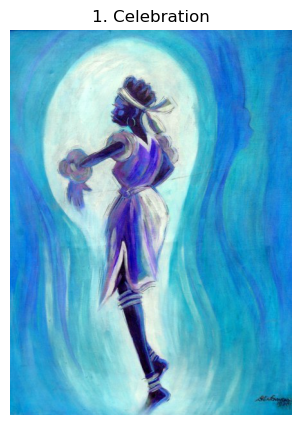

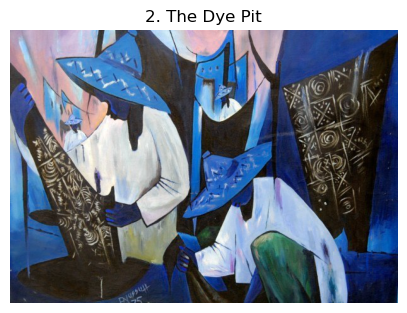

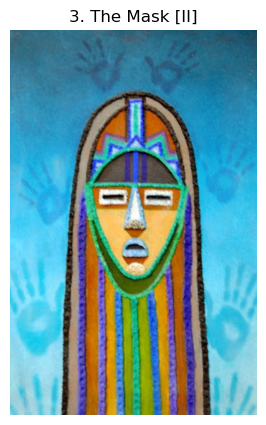

Please select by number, the image to be used for image processing: 2
Please select a transformation to be applied to image
1. Image Translation
2. Reflection
3. Image Rotation
4. Image Cropping
5. Sheared Image in X-Axis
6. Sheared Image in Y-Axis
7. Image Blurring
Enter your choice (1-7): 2


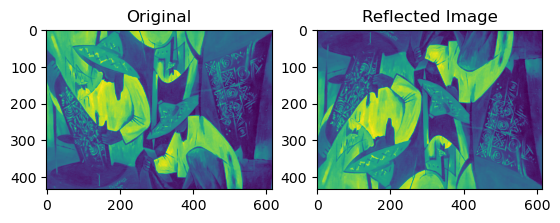

In [5]:
import cv2
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import re

# Validate email function
def is_valid_email(email):
    return re.match(r'^[\w\.-]+@[\w\.-]+\.\w+$', email) is not None

email = input('Please input a valid email: ')
age = int(input('Input age: '))
collection = input('Please select a collection category to view images from (Traditional , Modern or Contemporary): ')

collection_categories = {
    'Traditional': [{'name': 'Benin King Bust', 'picture': r"C:\Users\Tireni\Documents\tfemi-paulCSC418\week_3\project\traditional\Benin-King-Bust.jpg"}, {'name': 'Gelede Headdress', 'picture': r"C:\Users\Tireni\Documents\tfemi-paulCSC418\week_3\project\traditional\Gelede-Headdress.jpeg"}, {'name': 'Igbo Ukwu Art', 'picture': r"C:\Users\Tireni\Documents\tfemi-paulCSC418\week_3\project\traditional\Igbo-Ukwu-Art.jpg"}],
    'Modern': [{'name': 'Celebration', 'picture': r"C:\Users\Tireni\Documents\tfemi-paulCSC418\week_3\project\modern\Celebration.jpg"}, {'name': 'The Dye Pit', 'picture': r"C:\Users\Tireni\Documents\tfemi-paulCSC418\week_3\project\modern\The-Dye-Pit.jpg"}, {'name': 'The Mask [II]', 'picture': r"C:\Users\Tireni\Documents\tfemi-paulCSC418\week_3\project\modern\The-Mask-II.jpg"}],
    'Contemporary': [{'name': 'The Bater', 'picture': r"C:\Users\Tireni\Documents\tfemi-paulCSC418\week_3\project\contemporary\The-Bater.jpg"}, {'name': 'The Carrier', 'picture': r"C:\Users\Tireni\Documents\tfemi-paulCSC418\week_3\project\contemporary\The-Carrier.jpg"}, {'name': 'The Way Home', 'picture': r"C:\Users\Tireni\Documents\tfemi-paulCSC418\week_3\project\contemporary\The-Way-Home.jpg"}]
}


if not is_valid_email(email):
    print("Invalid email. Please enter a valid email.")
elif age < 18:
    print("You are not permitted to make use of this application. Sorry :(")
elif collection not in collection_categories:
    print("Please specify a (valid) collection: ")
else:
    images = collection_categories[collection]
    for idx, img_info in enumerate(images):
        img = cv2.imread(img_info['picture'])
        if img is None:
            print(f"Error: Could not load image from {img_info['picture']}. Check file path.")
            exit()
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.title(f"{idx + 1}. {img_info['name']}")
        plt.axis('off')
        plt.show()
        
    img_choice = int(input('Please select by number, the image to be used for image processing: '))
    idx = img_choice - 1
    if 0 <= idx < len(images):
        chosen_img = cv2.imread(images[idx]['picture'], 0)
    else:
        print("Invalid selection. Please enter a valid number.")
        exit()
    
    transformation = int(input("Please select a transformation to be applied to image\n"
                            "1. Image Translation\n"
                            "2. Reflection\n"
                            "3. Image Rotation\n"
                            "4. Image Cropping\n"
                            "5. Sheared Image in X-Axis\n"
                            "6. Sheared Image in Y-Axis\n"
                            "7. Image Blurring\n"
                            "Enter your choice (1-7): "))
    
    if transformation == 1:
        rows, cols = chosen_img.shape

        #Plot the original image
        plt.subplot(1, 2, 1)
        plt.title("Original")
        plt.imshow(chosen_img)

        M = np.float32([[1, 0, 100], [0, 1, 50]])
        transl = cv.warpAffine(img, M, (cols, rows))

        #Plot the translated image
        plt.subplot(1, 2, 2)
        plt.title("Translated Image")
        plt.imshow(transl)

        cv.waitKey(0)
        
    elif transformation == 2: 
        plt.subplot(1, 2, 1)
        plt.title("Original")
        plt.imshow(chosen_img)

        rows, cols = chosen_img.shape
        M = np.float32([[1, 0, 0], [0, -1, rows], [0, 0, 1]])
        reflected_img = cv.warpPerspective(chosen_img, M, (int(cols), int(rows)))

        #Plot the original image
        plt.subplot(1, 2, 2)
        plt.title("Reflected Image")
        plt.imshow(reflected_img)

        cv.imwrite('reflection_out.jpg', reflected_img)
        cv.waitKey(0)
        
    elif transformation == 3:
        rows, cols = chosen_img.shape

        #Plot the original image
        plt.subplot(1, 2, 1)
        plt.title("Original")
        plt.imshow(chosen_img)

        img_rotation = cv.warpAffine(chosen_img,
                            cv.getRotationMatrix2D((cols/2, rows/2),
                                                  30, 0.6), (cols, rows))

        #Plot the rotated image
        plt.subplot(1, 2, 2)
        plt.title("Rotated Image")
        plt.imshow(img_rotation)

        cv.imshow('chosen_img', img_rotation)
        cv.imwrite('rotation_out.jpg', img_rotation)
        cv.waitKey(0)
        
    elif transformation == 4:
        #Plot the original image
        plt.subplot(1, 2, 1)
        plt.title("Original")
        plt.imshow(chosen_img)

        cropped_img = chosen_img[150:250, 0:100]

        #Plot the original image
        plt.subplot(1, 2, 2)
        plt.title("Cropped Image")
        plt.imshow(cropped_img)

        cv.imwrite('cropped_out.jpg', cropped_img)
        cv.waitKey(0)
        
    elif transformation == 5:
        rows, cols = chosen_img.shape

        plt.subplot(1, 2, 1)
        plt.title("Original")
        plt.imshow(chosen_img)

        M = np.float32([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]])
        sheared_img = cv.warpPerspective(chosen_img, M, (int(cols * 1.5),
                                            int(rows * 1.5)))

        plt.subplot(1, 2, 2)
        plt.title("Sheared Image")
        plt.imshow(sheared_img)

        cv.imwrite('chosen_img', sheared_img)
        cv.waitKey(0)
        
    elif transformation == 6:
        rows, cols = chosen_img.shape

        plt.subplot(1, 2, 1)
        plt.title("Original")
        plt.imshow(chosen_img)

        M = np.float32([[1, 0, 0], [0.5, 1, 0], [0, 0, 1]])
        sheared_img = cv.warpPerspective(chosen_img, M, (int(cols * 1.5),
                                            int(rows * 1.5)))

        plt.subplot(1, 2, 2)
        plt.title("Sheared Image")
        plt.imshow(sheared_img)

        cv.imwrite('img', sheared_img)
        cv.waitKey(0)
        
    elif trasformation == 7:
        cv2.imshow('Original Image', chosen_img)
        cv2.waitKey(0)

        # Gaussian Blur
        Gaussian = cv2.GaussianBlur(chosen_img, (7, 7), 0)
        cv2.imshow('Guassian Blurring', Gaussian)
        cv2.waitKey(0)

        # Median Blur

        median = cv2.medianBlur(chosen_img, 5)
        cv2.imshow('Median Blurring', median)
        cv2.waitKey(0)

        # Bilateral Blur
        bilateral = cv2.bilateralFilter(chosen_img, 9, 75, 75)
        cv2.imshow('Bilateral Blurring', bilateral)
        cv.waitKey(0)
    